# Read Data from feather

In [94]:
import feather

In [95]:
loans =feather.read_dataframe('./loans_modelling_data')

In [96]:
loans.shape

(13546, 120)

# Data Preprocessing for Evaluation

## Splitting data into train and test

In [97]:
loans_train = loans.loc[loans['issue_d'] <  loans['issue_d'].quantile(0.9)]
loans_test =  loans.loc[loans['issue_d'] >= loans['issue_d'].quantile(0.9)]

In [98]:
print('Number of loans in the partition:   ', loans_train.shape[0] + loans_test.shape[0])
print('Number of loans in the full dataset:', loans.shape[0])

Number of loans in the partition:    13546
Number of loans in the full dataset: 13546


In [99]:
loans_test.shape[0] / loans.shape[0]

0.10039864166543629

In [100]:
del loans

In [101]:

loans_train.drop('issue_d', axis=1, inplace=True)
loans_test.drop('issue_d', axis=1, inplace=True)

In [102]:
y_train = loans_train['charged_off']
y_test = loans_test['charged_off']

In [103]:
X_train = loans_train.drop('charged_off', axis=1)
X_test = loans_test.drop('charged_off', axis=1)

In [104]:
del loans_train, loans_test

## Modelling

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
pipeline_rfc = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [108]:
param_grid_rfc = {'model__n_estimators': [100,200,300,600],
               'model__max_features': ['sqrt', 0.5,0.75,1.0],
               'model__max_depth' : [5,10,20],
              }

In [109]:
grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [110]:
grid_rfc=grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 23.1min finished


In [111]:
grid_rfc.best_score_

0.7046345600932196

In [112]:
grid_rfc.best_params_

{'model__max_depth': 10,
 'model__max_features': 'sqrt',
 'model__n_estimators': 600}

In [113]:
X_train=X_train.fillna(X_train.mean()) # To remove error missing values
X_test=X_test.fillna(X_test.mean())

In [114]:
import pandas as pd
%matplotlib inline

In [115]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<AxesSubplot:>

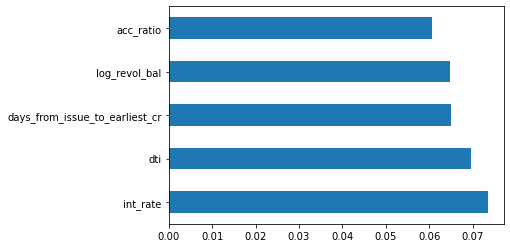

In [116]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(5)
   .plot(kind='barh')) 

### ACCUARACY,  F1 SCORE AND ROC AUC FOR TRAIN DATA

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [118]:
# See the inital model performance
clf = RandomForestClassifier(random_state=10)
print('Acc:', cross_val_score(clf, X_train, y_train, 
                              cv=StratifiedKFold(n_splits=5), 
                              scoring='accuracy').mean())
print('F1:', cross_val_score(clf, X_train, y_train, 
                             cv=StratifiedKFold(n_splits=5), 
                             scoring='f1').mean())
print('ROC AUC:', cross_val_score(clf, X_train, y_train, 
                                  cv=StratifiedKFold(n_splits=5), 
                                  scoring='roc_auc').mean())

C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\mi

Acc: 0.7959135797254719


C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\mi

F1: 0.14202440464188618


C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\mi

ROC AUC: 0.6325552864005232


### Prediction on test data

In [122]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
y_score = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

0.6360393671564653

#### Confusion Matrix for test data

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
rfc_cv_score =cross_val_score(rfc, X_train, y_train, cv=10, scoring='roc_auc')

In [126]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1056   38]
 [ 235   31]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1094
           1       0.45      0.12      0.19       266

    accuracy                           0.80      1360
   macro avg       0.63      0.54      0.54      1360
weighted avg       0.75      0.80      0.75      1360



=== All AUC Scores ===
[0.65195072 0.62519172 0.62721996 0.65699828 0.62816704 0.65189624
 0.65483175 0.65628261 0.60158591 0.61779944]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6371923662779261


#### ROC Curve

In [127]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve

In [128]:
import matplotlib.pyplot as plt

In [129]:
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

In [ ]:
roc_auc = metrics.auc(fpr, tpr)

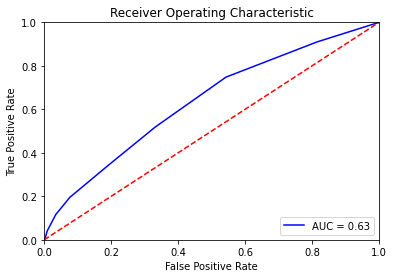

In [130]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [131]:
roc_auc_score(y_test,y_pred_proba)

0.6360393671564653

#### Cumulative Gains Curve

In [132]:
import scikitplot as skplt

In [133]:
y_pred_probas = rfc.predict_proba(X_test)

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

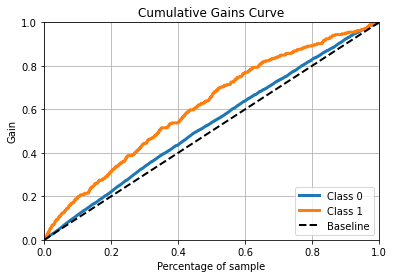

In [134]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)

In [ ]:
#y_test.shape

In [ ]:
#y_pred_probas.shape

#### Precision Recall Curve

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
from sklearn.metrics import auc

In [137]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [138]:
# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

0.3080644174647792


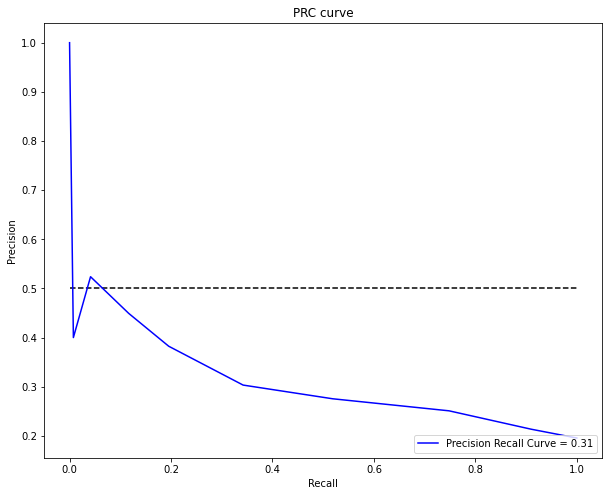

In [139]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision,'b', label = 'Precision Recall Curve = %0.2f' % auc_prc)
plt.legend(loc = 'lower right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PRC curve')
plt.show()